In [21]:
# Importing Python Libraries

# This will be used to import all the required Python libraries for the Project

import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Importing the Data 

# The Iris data set has been downloaded from the internet in .csv format and saved in the current directory
# We will use the Pandas Dataframe methodology as the key Python concept for analysis in this Notebook [1]
# We proceed to use the read_csv command to read the iris.csv file into our program
# A typical way of referencing the data when using pandas is "df" so here we are setting the dataset variable to be "df"

df = pd.read_csv('iris.csv')

In [23]:
# Data at First Glance

# To get our first glance at the data - we use the head command - this will return the top 5 rows of the dataset by default
# This confirms what our analysis has pointed to:
# 5 columnsm, 4 of which appear to be numbers and the last column which is the class column containing the species of the flower

print(df.head())


   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [24]:
# Data at First Glance

# We can also look at the bottom of the data set using the tail function.
# The benefit of this is that it will confirm to us the number of rows in set

print(df.tail())

     sepallength  sepalwidth  petallength  petalwidth           class
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica


As the index column goes from 0 to 149; this confirms to us that there are 150 rows in the data set.

In [25]:
# Column name of class I want to change to be "species"

df.rename(columns={"class":"species"}, inplace=True) #adding inplace=True means the underlying data is changed

In [26]:
# Data Types / Quality

# We want to confirm the data is as expected and that there are no gaps in it before we start to use it.
# We will start by looking if there are any null values
# Using an isnull function - I am asking it to count the number of null values in each colum [2]

print(df.isnull().sum())

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
species        0
dtype: int64


In [27]:
# Data Types / Quality

# The info function will provide us with further understanding about the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


To explain my understanding of the output of df.info;

Line 1: <class 'pandas.core.frame.DataFrame'>
    -> Confirms to me that we are dealing with a Pandas DataFrame (as expected)

Line 2: RangeIndex: 150 entries, 0 to 149
    -> 150 different rows of data (correct - as per earlier research)
    
Lines 4 - 10:
    -> Small table clarifies what we are dealing with further:
        i.   That each of the columns have 150 non-null values
        ii.  That the data types for the length / width fields are float64
        iii. That the data type for the the species is an object



In [29]:
# Raw Data Analysis

# Before we move to the more visual techniques of plotting and charting - I first want to review the data by looking
# at it directly and making my own determinations on certain things.

# e.g what can I learn by grouping certain things together

# Firstly - I am going to group the species class together (which is the species) to see how these are distributed 
# Python / Pandas has a few ways we can do this - first choice here is a groupby concept where I want to group by the class
# and compute the size of this group [3]

print(df.groupby('species').size())  

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


The output here tells me that there is an even distribution of species; that is there are 50 of each of the 3 types of Iris

In [30]:
# An additional method of retrieving the same output is to use the value_counts concept - again focusing only on the species [4]

print(df.value_counts("species"))

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


I am going to proceed to use the groupby concept to try learn some more about the individual species.

In [12]:
# The standard describe() function within Pandas is very informative however this includes analysis of all 150 rows and 
# I dont learn anything about the individual species

print(df.describe())

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [31]:
# To get similar informations on particualr species - I need to add in a groupby on the class.
# I am also here going to do one column at a time (e.g sepallength) so that the output is not too confusing.

print(df.groupby('species')['sepallength'].describe()[['max','min','mean']])
print(df.groupby('species')['petallength'].describe()[['max','min','mean']])
print(df.groupby('species')['sepalwidth'].describe()[['max','min','mean']])
print(df.groupby('species')['petalwidth'].describe()[['max','min','mean']])

                 max  min   mean
species                         
Iris-setosa      5.8  4.3  5.006
Iris-versicolor  7.0  4.9  5.936
Iris-virginica   7.9  4.9  6.588
                 max  min   mean
species                         
Iris-setosa      1.9  1.0  1.464
Iris-versicolor  5.1  3.0  4.260
Iris-virginica   6.9  4.5  5.552
                 max  min   mean
species                         
Iris-setosa      4.4  2.3  3.418
Iris-versicolor  3.4  2.0  2.770
Iris-virginica   3.8  2.2  2.974
                 max  min   mean
species                         
Iris-setosa      0.6  0.1  0.244
Iris-versicolor  1.8  1.0  1.326
Iris-virginica   2.5  1.4  2.026


When I review the output above - I can quickly make some basic statements about certain species:

a. Both the maximum petalwidth (0.6) and petallength (1.9) of the Iris-setosa are less than the minimum petalwidth (1/1.4) and petallength (3/4.5) of both other species => the petals of the Iris-setosa are typically always smaller than Iris-versicolor and Iris-virginica

b. The characteristics of the sepals are not as conclusive - all three species share a minimum sepallength in the 4.3 - 4.9 range and a minimum sepalwidth in the 2 - 2.3 range.  We cannot make any explicit statements with regards to sepals like we could with petals in a. above

c. Even though the Iris-setosa has the smallest petals; the sepals of the Iris-setosa are wider (Mean = 3.418) than both the others (Means are 2.770/2.974) => the Iris-setosa coule be described as having very small petals with much larger sepals

d. Both the Iris-versicolor and Iris-virginica share quite relatively similar attributes sizings at first glance - it will be interesting to see how these look when we start to plot these later. 

Analysis thus far has been on the 4 columns of numbers; the legnths and widths of the sepals and petals of each flower. I am going to now see if I can learn anything by combining the length and width together.  I will do a multiplication; that is length * width and we will call this the area (e.g sepalarea) Similar to getting the area of a regular shape like a rectangle - the formula for this is length * width.  Even though these flower parts are not regular shapes - I still believe we can learn something more about the individual species by doing this area style calculation

In [32]:
# Adding new columns to the Pandas Dataframe

# To add the columns we need to provide a name for the new column and the forumla to derive the new column [5]

df["sepalarea"] = (df.sepallength*df.sepalwidth)
df["petalarea"] = (df.petallength*df.petalwidth)

In [33]:
# Looking at the data - we now see the additional two columns at the end

df.head()

,sepallength,sepalwidth,petallength,petalwidth,species,sepalarea,petalarea
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [34]:
# Then to see if I can find this useful - I will use an earlier groupby function to help analyse the areas

print(df.groupby('species')['sepalarea'].describe()[['max','min','mean']])
print(df.groupby('species')['petalarea'].describe()[['max','min','mean']])

                   max    min     mean
species                               
Iris-setosa      25.08  10.35  17.2088
Iris-versicolor  22.40  10.00  16.5262
Iris-virginica   30.02  12.25  19.6846
                   max   min     mean
species                              
Iris-setosa       0.96  0.11   0.3628
Iris-versicolor   8.64  3.30   5.7204
Iris-virginica   15.87  7.50  11.2962


With a quick view of this data - again I can see some obvious trends repeating themselves and some new information appearing:

a. sepalarea confirms that the sepal size is relatively similar as the means are all between 17.2 and 19.7

b. petalarea clarifies that the Iris-setosa has a much smaller petal however the petalarea for the other two species has a much broader range in mean than i expected.  Iris-versicolor has a mean petal area of 5.7204 while the Iris-virginica is nearly double that at 11.2962.  I found this interesting as the mean petallength value for these species was much closer in size; 4.26 v 5.552

The next section of analysis will involve more visual techniques such as charting and plotting.
The Python library Matplotlib will be used to help us produce useful and meaningful output so that we can better understand the Iris dataset.

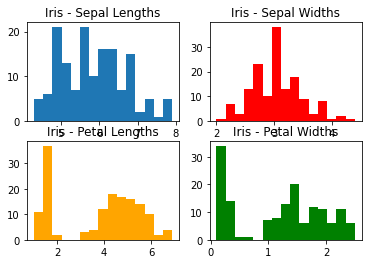

In [35]:
# We will start with the standard histogram of each variable

plt.subplot(2,2,1)

plt.hist(df['sepallength'], bins = 15)

plt.title('Iris - Sepal Lengths')

plt.subplot(2,2,2)

plt.hist(df['sepalwidth'], bins = 15, color = 'red')

plt.title('Iris - Sepal Widths')

plt.subplot(2,2,3)

plt.hist(df['petallength'], bins = 15, color = 'orange')

plt.title('Iris - Petal Lengths')

plt.subplot(2,2,4)

plt.hist(df['petalwidth'], bins = 15, color = 'green')

plt.title('Iris - Petal Widths')

plt.show()

From a quick look at the individual plots - we can see the sepals along the top appear to be relatively normally distributed while the petals do not follow that pattern.  It is likely this skew on the data of petals is due to differing attributes of certain species.  I am expecting this to be the Iris-setosa which we learned to have much smaller petals in the earlier analysis of the numbers however we will now try and plot this to further confirm this theory.

The next type of plot we will move onto is the Scatterplot.  These plots are a good way of displaying relationships between variables. [6] In the analysis.py program - we have outputted Scatterplots for each pair of variables however in this Jupyter Notebook - we are going to dig a little deeper and we are going to separate the data by species on the plot itself.

In [39]:
# Getting setup for the Scatter Plots

colors = ['red','green','blue'] # this defines a list of colors to be used
species = ['Iris-setosa','Iris-versicolor','Iris-virginica'] # this is mapping the list of colors to the color


The code we are going to use for the Scatter is similar to what we used in analysis.py however the approach I 
am taking is to use a for loop to then cycle through each of the three species.  [7]

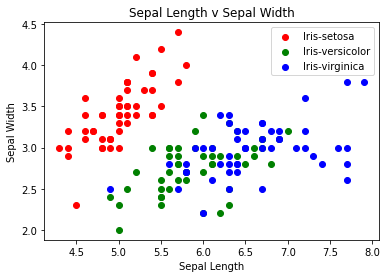

In [47]:
for i in range(3):    # 3 species
    x = df[df['species'] == species[i]]           
    plt.scatter(x['sepallength'],x['sepalwidth'], c = colors[i], label = species[i])   
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("Sepal Length v Sepal Width")
    plt.legend()

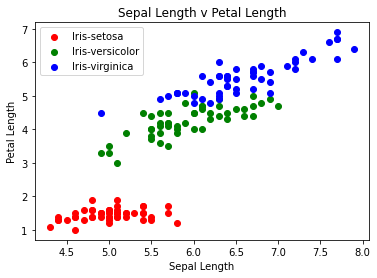

In [49]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepallength'],x['petallength'], c = colors[i], label = species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Sepal Length v Petal Length")
    plt.legend()

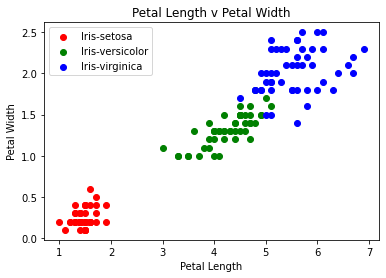

In [50]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petallength'],x['petalwidth'], c = colors[i], label = species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title("Petal Length v Petal Width")
    plt.legend()

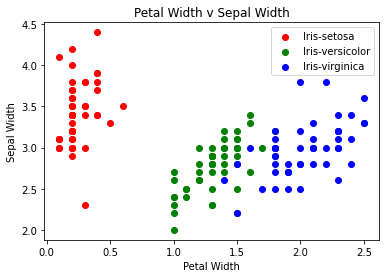

In [51]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petalwidth'],x['sepalwidth'], c = colors[i], label = species[i])
    plt.xlabel("Petal Width")
    plt.ylabel("Sepal Width")
    plt.title("Petal Width v Sepal Width")
    plt.legend()

The above 4 Scatter Plots provide a valuable visual insight into the Iris dataset and confirm some of the earlier analysis we completed.

i) Scatter 1 of the Sepal Length / Widths shows us that the sepals of the iris-setosa are typically wider but shorter than the other two species.

ii) Scatter 2 of the lengths of the Sepals / Petals immediately show us that the iris-setosa is much shorter than ther other two; with the iris-virginica being the longest

iii) Scatter 3 of the Petal only attributes again displays that the iris-setosa has the much smaller of the petals and the largest petals nearly always being the iris-virginica.

iv) Scatter 4 of the widths shows the narrower petals but wider sepals of the iris-setosa.

In [ ]:
References:
    
    [1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
    [2]: https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/
    [3]: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.size.html
    [4]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html
    [5]: https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
    [6]: https://chartio.com/learn/charts/what-is-a-scatter-plot/?msclkid=f6216c8ccea911ec947ddf065232159b
    [7]: https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/?msclkid=65917575ceb311ec8fb78cb933c361fc